In [4]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib import pyplot as plt
# import plotly.express as px
%matplotlib inline
import datetime as dt
import calendar
import warnings
warnings.simplefilter('ignore')
import math
# from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
# plt.style.use('fivethirtyeight')
# from fbprophet.plot import plot_plotly, plot_components_plotly
# from fbprophet.diagnostics import cross_validation
from datetime import date, datetime, time, timedelta
from dateutil.relativedelta import relativedelta
import datetime as dt

import itertools
# from fbprophet.diagnostics import performance_metrics

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from nsepy import get_history

In [5]:
name='Lupin'
data = get_history(symbol=name, start=date(2018,3,1), end=date(2021,2,28)) # Extracting 3 years of the stock data
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2018-03-01,LUPIN,EQ,819.950,820.000,824.250,802.300,804.000,803.900,809.780,1311644,106214630190000.000,45135,666075,0.508
2018-03-05,LUPIN,EQ,803.900,804.000,806.000,789.000,790.000,790.150,792.760,1944252,154133106220000.000,51990,1104401,0.568
2018-03-06,LUPIN,EQ,790.150,792.000,795.000,768.400,770.550,773.400,780.730,2526715,197268322655000.000,76323,1199819,0.475
2018-03-07,LUPIN,EQ,773.400,772.000,773.400,756.000,762.700,761.750,763.060,1288034,98284523595000.000,36490,442235,0.343
2018-03-08,LUPIN,EQ,761.750,765.000,774.400,750.150,770.900,771.150,763.210,1345222,102669068135000.000,36767,497920,0.370


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000261AA5288E0>,
      dtype=object)

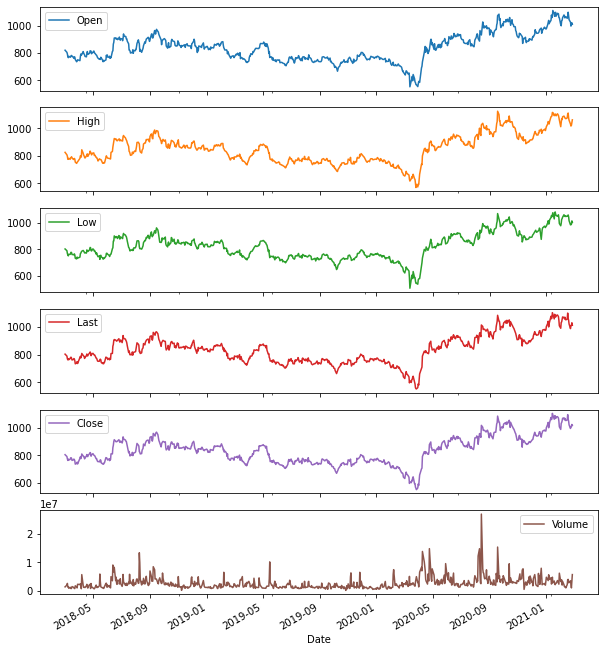

In [6]:
visual_data = data[[ 'Open', 'High', 'Low', 'Last',
       'Close','Volume']]
visual_data.plot(subplots=True, figsize=(10,12))

In [21]:
train_data = get_history(symbol=name, start=date(2019,3,1), end=date(2021,3,1))  # Extracting 3 years of the stock data
test_data = get_history(symbol=name, start=date(2021,3,1), end=date(2021,6,1))  # Extracting 3 years of the stock data
train_data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-03-01,LUPIN,EQ,763.750,771.200,790.550,768.450,790.550,786.600,777.590,2349879,182725293125000.000,35836,1154049,0.491
2019-03-05,LUPIN,EQ,786.600,791.550,791.600,778.100,785.200,784.600,784.370,1220769,95753032890000.000,32625,312043,0.256
2019-03-06,LUPIN,EQ,784.600,786.000,794.600,781.050,787.500,789.050,788.100,1395812,110004106355000.000,34828,441158,0.316
2019-03-07,LUPIN,EQ,789.050,788.000,803.500,785.300,792.000,792.000,796.680,1852651,147597246660000.000,42480,577371,0.312
2019-03-08,LUPIN,EQ,792.000,797.900,799.800,775.350,776.000,779.150,790.530,1971916,155886252165000.000,42651,472530,0.240


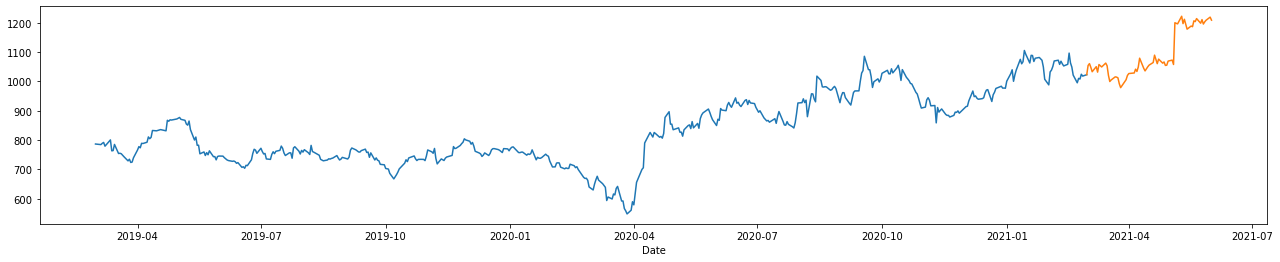

In [22]:
train_data['Close'].plot(figsize=(22,4))
test_data['Close'].plot(figsize=(22,4))

In [23]:

test_data = test_data.reset_index()
test_data['month'] = test_data['Date'].apply(lambda x: x.strftime('%Y%m'))
test_data['month'] = test_data['month'].apply(lambda x: str(x))
test_data_montly=pd.pivot_table(test_data,values='Close',index='month',aggfunc=np.mean).reset_index()
test_data_montly.head()

,month,Close
0,202103,1028.219
1,202104,1055.166
2,202105,1188.803
3,202106,1209.200


In [28]:

train_data = train_data.reset_index()
train_data['month'] = train_data['Date'].apply(lambda x: x.strftime('%Y%m'))
train_data['month'] = train_data['month'].apply(lambda x: str(x))
train_data_montly=pd.pivot_table(train_data,values='Close',index='month',aggfunc=np.mean).reset_index()
train_data_montly.head()

,month,Close
0,201903,763.042
1,201904,822.034
2,201905,792.593
3,201906,731.432
4,201907,758.159


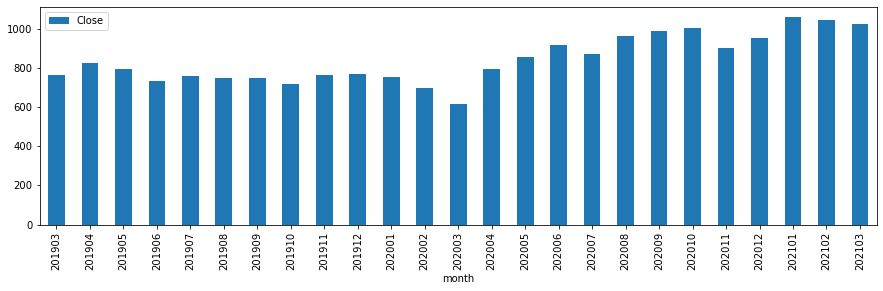

In [32]:
train_data_montly.plot(kind='bar',figsize=(15,4),x='month',y='Close')


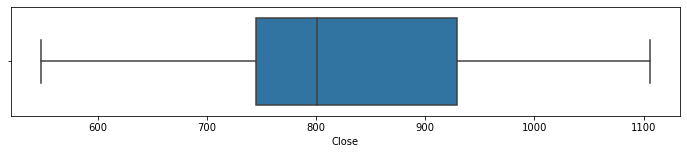

In [33]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=train_data['Close'],whis=1.5)

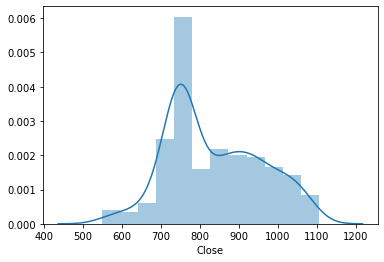

In [34]:
sns.distplot(train_data['Close'])

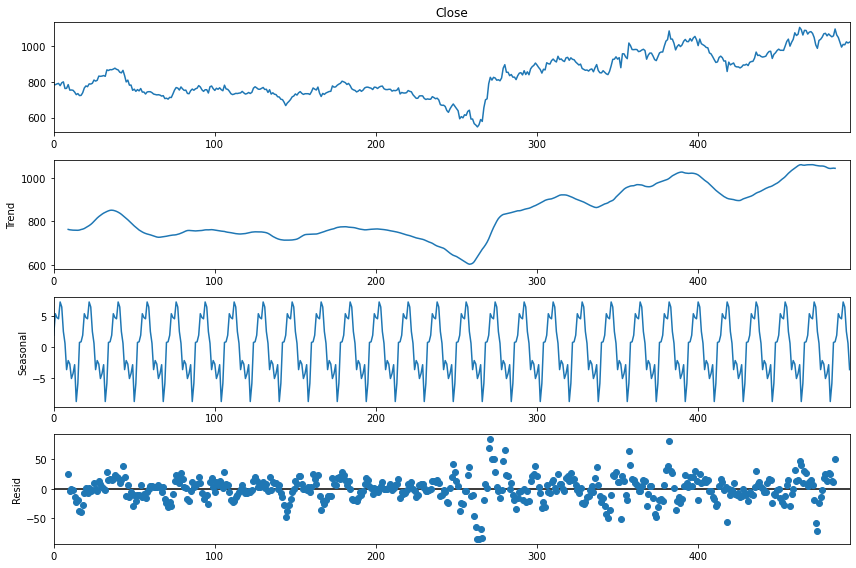

In [51]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train_data.Close,period=18, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

In [60]:
## Holt's Winter Forecast 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
y_hat_hwm = test_data.copy()
model = ExponentialSmoothing(np.asarray(train_data['Close']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['Forecast'] = model_fit.forecast(61)

{'smoothing_level': 0.9444416921337762, 'smoothing_slope': 1.2780571204702722e-48, 'smoothing_seasonal': 1.9182970036572283e-46, 'damping_slope': nan, 'initial_level': 833.6822493329474, 'initial_slope': 0.5122215872508393, 'initial_seasons': array([0.94291823, 0.94324796, 0.93864564, 0.94051617, 0.94340606,
       0.94583882, 0.94774443, 0.94833631, 0.9444991 , 0.9451687 ,
       0.94933816, 0.94559279]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


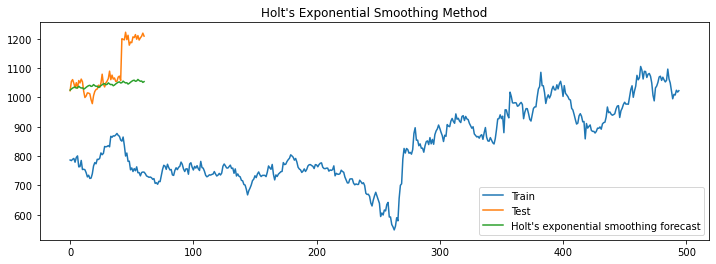

In [62]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.plot(y_hat_hwm['Forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()